In [106]:
import torch
import os
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms


In [107]:

dataset_dir = os.path.join("./tiny-imagenet-200/")

val_dir = os.path.join(dataset_dir, 'val')
img_dir = os.path.join(val_dir, 'images')
fp = open(os.path.join(val_dir, 'val_annotations.txt'), 'r')
data = fp.readlines()
val_img_dict = {}
for line in data:
    words = line.split('\t')
    val_img_dict[words[0]] = words[1]
fp.close()
for img, folder in val_img_dict.items():
    newpath = (os.path.join(img_dir, folder))
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join(img_dir, img)):
        os.rename(os.path.join(img_dir, img), os.path.join(newpath, img))

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val', 'images')
test_dir= os.path.join(dataset_dir, 'test')

norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406])
train_trans = [transforms.RandomHorizontalFlip(), transforms.ToTensor()]
val_trans = [transforms.ToTensor(), norm]
test_trans = [transforms.ToTensor(), norm]


dataTrain =ImageFolder(train_dir, transform=transforms.Compose(train_trans + [norm]))
dataVal =ImageFolder(val_dir, transform=transforms.Compose(val_trans))
dataTest=ImageFolder(test_dir, transform=transforms.Compose(test_trans))

batch_size = 64




In [108]:
# Charger les données dans le batch


trainloader = torch.utils.data.DataLoader(dataTrain, batch_size=batch_size,
                                                shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(dataVal , batch_size=batch_size,
                                               shuffle=True, num_workers=2)

testloader=torch.utils.data.DataLoader(dataTest, batch_size=batch_size,
                                               shuffle=True, num_workers=2)

In [109]:
print(f"Length of Train Data : {len(trainloader)}")
print(f"Length of val Data : {len(valloader)}")
print(f"Length of test Data : {len(testloader)}")

Length of Train Data : 1563
Length of val Data : 157
Length of test Data : 157


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


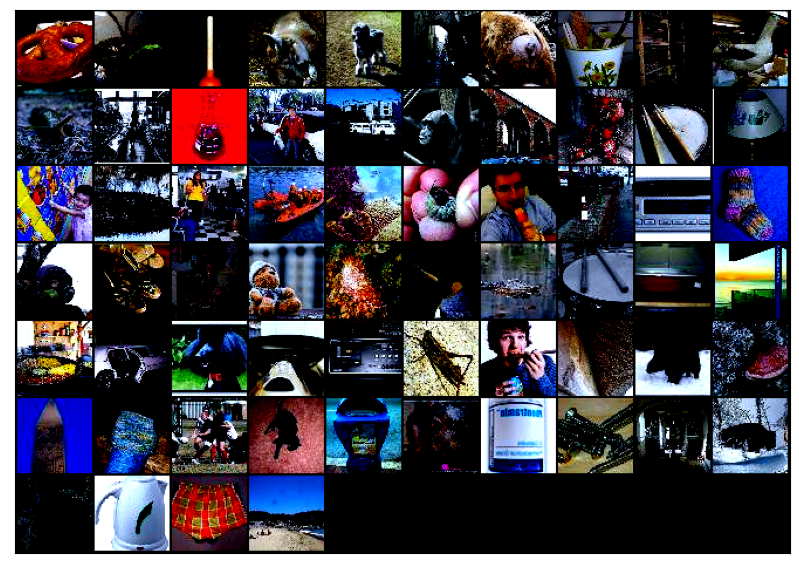

In [110]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=10).permute(1,2,0))
        break
        
show_batch(trainloader )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


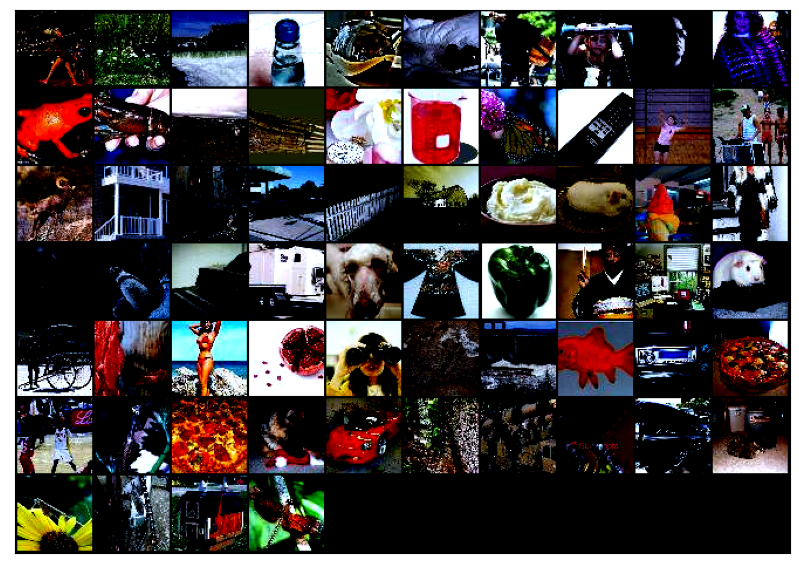

In [111]:
show_batch(valloader )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


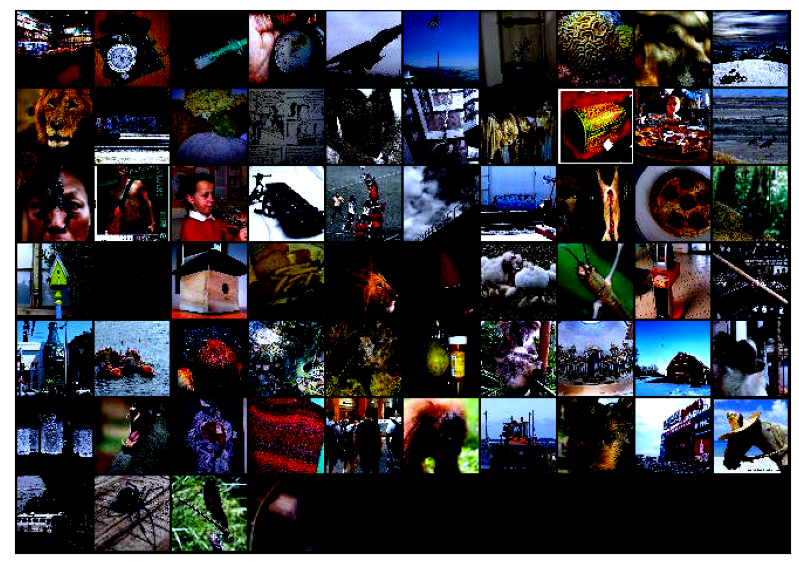

In [112]:
show_batch(testloader)

In [113]:
# import torch.nn as nn
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()
#         # 1 input image channel, 6 output channels, 5x5 square convolution
#         # kernel
#         self.conv1 = nn.Conv2d(3, 6, 7)
#         self.conv2 = nn.Conv2d(6, 16, 7)
#         self.conv3 = nn.Conv2d(16, 32, 7)
#         # an affine operation: y = Wx + b
#         self.fc1 = nn.Linear(16 * 11 * 11, 700)  # 7*7 from image dimension
#         self.fc2 = nn.Linear(700,400)
#         self.fc3 = nn.Linear(400, 200)

#     def forward(self, x):
#         # Max pooling over a (2, 2) window
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
#         # If the size is a square, you can specify with a single number
#         x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#         x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))

#         x = self.fc3(x)
#         return x
# net = Net()
# print(net)
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 7)
        self.conv2 = nn.Conv2d(6, 16, 7)
        self.fc1 = nn.Linear(16 * 11 * 11, 300)  
        self.fc2 = nn.Linear(300,250)
        self.fc3 = nn.Linear(250, 200)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=1936, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=200, bias=True)
)


In [115]:
import torch.optim as optim
learning_rate = 1e-5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),learning_rate )
# optimizer = optim.Adam(net.parameters(),learning_rate , momentum=0.9)

In [116]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 450 == 449:    # print every 250 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 450:.3f}')
            running_loss = 0.0

print('Finished Training')



[1,   450] loss: 5.298
[1,   900] loss: 5.295
[1,  1350] loss: 5.281
[2,   450] loss: 5.209
[2,   900] loss: 5.132
[2,  1350] loss: 5.080
Finished Training


In [117]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = net(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [118]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    test_loop(testloader, net, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.601960 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.604239 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.605828 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.604064 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.603455 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.605969 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.605340 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.604706 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.603599 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 0.2%, Avg loss: 5.603483 

Done!


In [119]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
